Start to Finish Data Science with Anaconda
=======================
*Anaconda 4.3, early 2017*
-------------------------

Data science is about a systematic way to apply numerical and visual techniques to analyze and interpret data.  To do that you need easy access to the best numerical computing, data processing, and visualization tools today.

<center>
<img src=https://s3.amazonaws.com/ijstokes-public/cio/img/Anaconda_stacked_RGB.png width=400 />
</center>

This material is part of a 60 minute workshop introducing you to Anaconda: your gateway to a rich ecosystem of open source data science tools and libraries.

Part A (10 minutes)
------
* Introduction
* Setup
* Conda Environments

Part B (20 minutes)
------
* Pandas data injest and manipulation
* Bokeh data visualization
* Scikit-Learn machine learning
* Q&A

Part C (10 minutes)
------
* Anaconda Project specifications
* Project deployment

Part D (10 minutes)
------
* Anaconda Enterprise v4 workflow
* Anaconda Enterprise v5 workflow

Part E (10 minutes)
------
* Announcements
* Survey
* Q&A

A - Setup & Smoke Test
==========

1 - Save this Notebook into your Anaconda working space
------------------------------
* Anaconda Distribution for people using their laptop directly: save these inside the Anaconda Project directory
* Anaconda Enterprise for people using a web-interface to access server-deployed Anaconda: create a new project then upload the notebook file into the project
    
2 - Terminal Window
-------------------
Get to a terminal window either through Navigator (if you are running the Anaconda Distribution on your local system) or through the Project view (if you are using Anaconda Enterprise), as shown in the screenshots below

### 2a - Anaconda Navigator (local users)

In [1]:
from IPython.display import Image

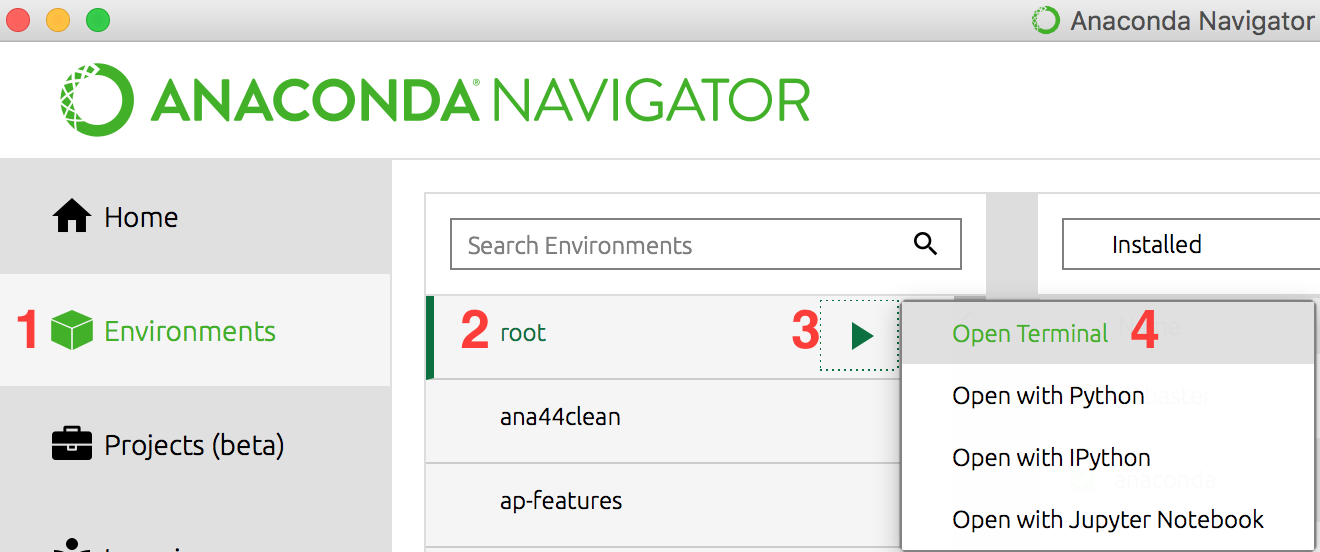

In [2]:
Image("imgs/AnacondaNavigatorOpenTerminal.png")

### 2b - Anaconda Enterprise 4 (server based)

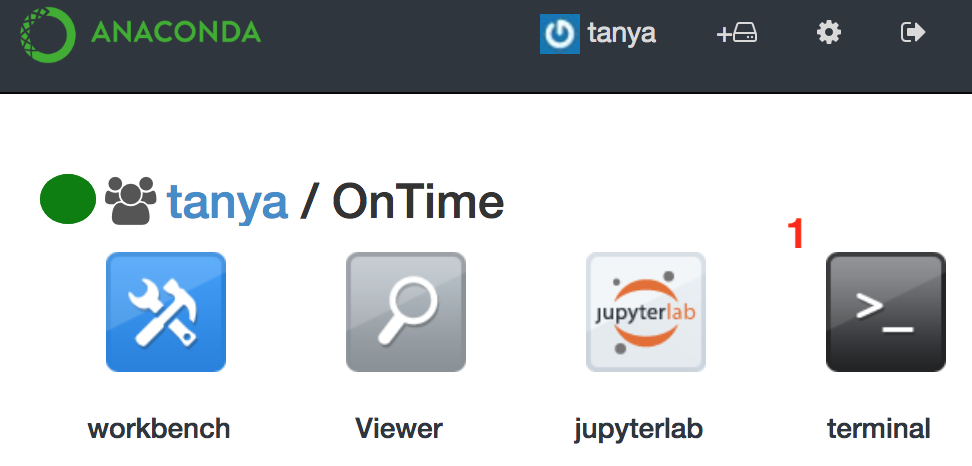

In [3]:
Image("imgs/AnacondaEnterprise4OpenTerminal.png")

### 2c - Anaconda Enterprise 5 (server based)

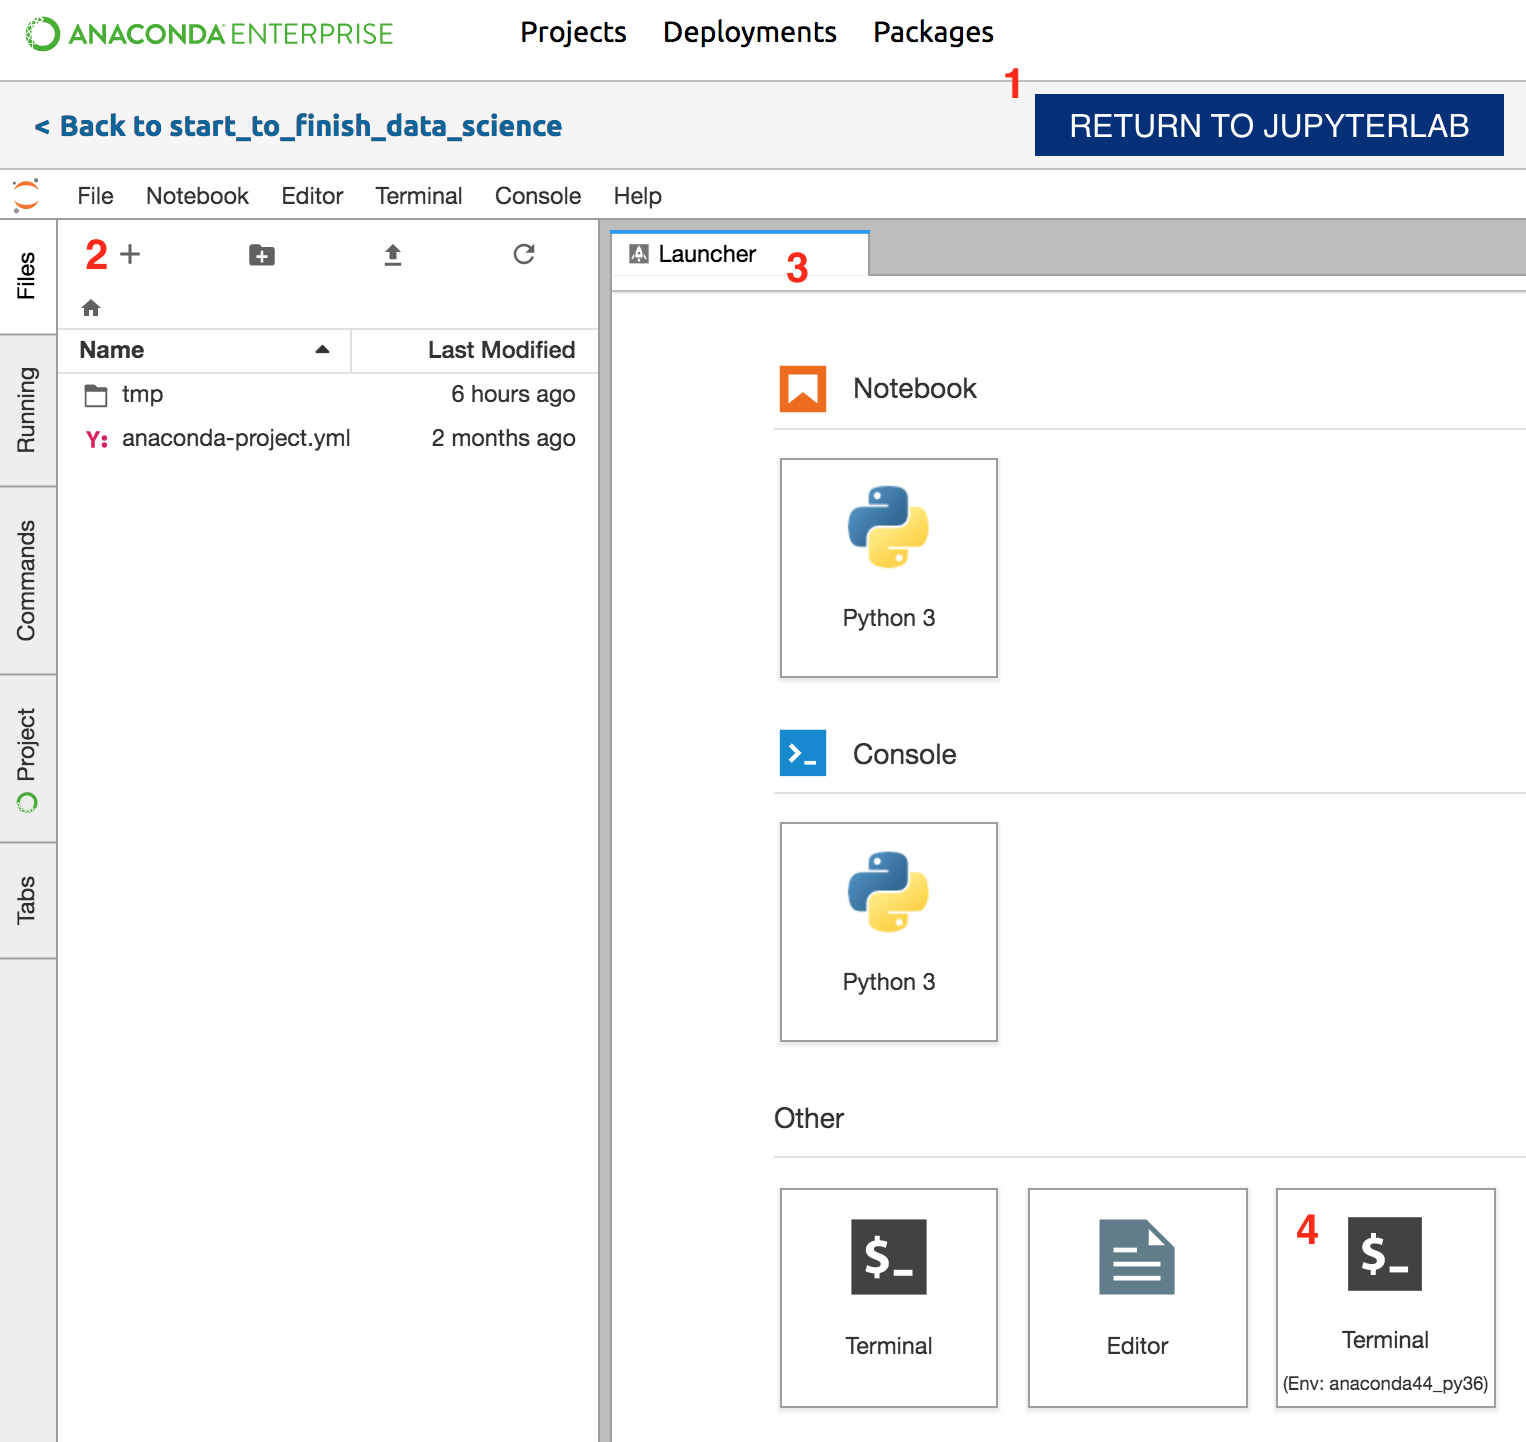

In [4]:
Image("imgs/AnacondaEnterprise5OpenTerminal.png")

3 - Create a conda environment
----------------------------
We want everyone on the same page which means creating a reference conda environment and using that for this workshop.  Since enterprise users of Anaconda are the target audience, and sometimes in an enterprise setting it can take many months to get the latest version of a piece of software, we'll use the early 2017 release of Anaconda, version 4.3, as our reference.

From the terminal window you opened, execute the following command:

```
conda create -n anaconda43 anaconda=4.3
```

If that doesn't work properly for you then an alternate strategy is to execute:

```
conda create -n approx43 jupyter bokeh=0.12.4 pandas=0.19.2 scikit-learn=0.18.1
```

4 - Start Jupyter Notebook with this conda environment
---------------------------------------------------
You now need to get Jupyter started in the right environment:

### 4a - Jupyter from Navigator

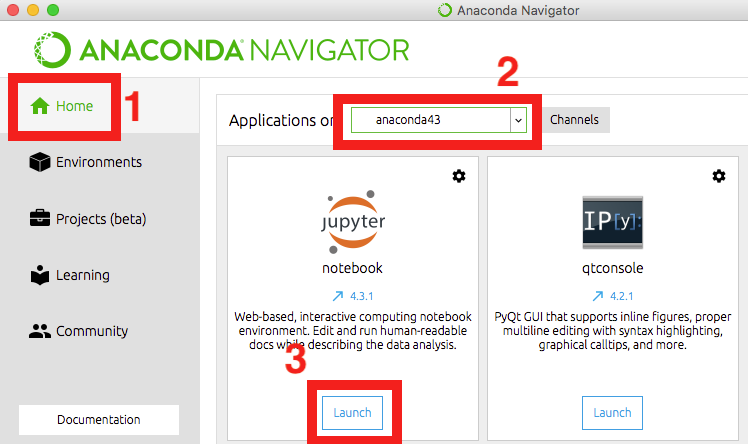

In [5]:
Image("imgs/AnacondaSelectHomeEnvJupyter.png")

### 4b - Anaconda Enterprise 4 Change Kernel

From within your project, select **"Jupyter"** and then pick the `anaconda43` kernel.  You may get a *"Kernel not found"* error.

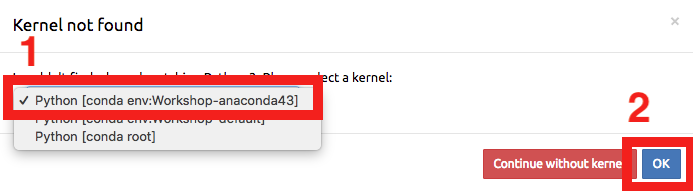

In [6]:
Image("imgs/AnacondaEnterprise4KernelNotFound.png")

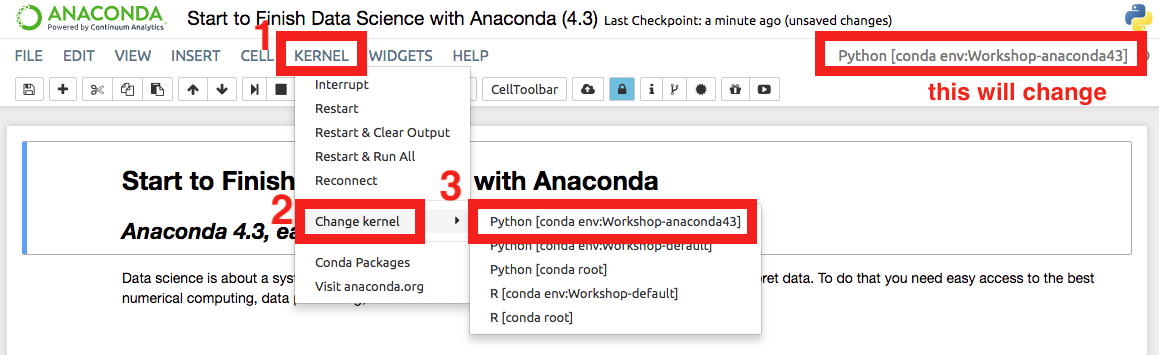

In [7]:
Image("imgs/AnacondaEnterprise4ChangeKernel.png")

5 - Smoke Test
-------------

Execute each of the following by pressing `SHIFT-ENTER`.  They all should work.

In [ ]:
import sys
from __future__ import print_function, with_statement

In [ ]:
print(sys.executable)

In [ ]:
print(sys.version)

In [ ]:
import pandas as pd

In [ ]:
import bokeh as bk

In [ ]:
import sklearn as skl

Part B - Data Science Workflow
================

This short workshop shows how easy it is to perform key aspects of the data science workflow:

* data injest
* data manipulation
* data visualization
* data analysis
* data modeling

You aren't expected to follow exactly every step.  But this should help motivate you to see how much can be achieved with the exciting world of Open Data Science using the Anaconda platform.

Navigate to the Anaconda Cloud page for this asset which can be found at:

<p>
<font size="+1">
[http://anaconda.org/ijstokes/start-to-finish-data-science](http://anaconda.org/ijstokes/start-to-finish-data-science)
</font>
</p>

Anaconda Cloud provides a public instance of Anaconda Repository.  That particular asset has been published in the `ijstokes` channel as a publicly accessible Jupyter Notebook.  From there you can download a template version of the Notebook that will allow you to follow along.


1 - Injest, analyze, and clean data with Pandas
-----------------------------------------
<center>
<img src=http://pandas.pydata.org/_static/pandas_logo.png />
</center>
Reference: [Pandas documentation](http://pandas.pydata.org)

In [ ]:
import pandas as pd

pd.set_option("display.max_rows",10)

Normally we wouldn't read data this way, but this is some sample data that is bundled with Bokeh for convenience

In [ ]:
from bokeh.sampledata.autompg import autompg

In Python just typing the name of a variable will show you a "representation" of that variable. In the case of a `pandas.DataFrame` we'll see a data table.

In [ ]:
type(autompg)

In [ ]:
autompg

Look at the data, sorted by fuel efficiency dimension `mpg`

In [ ]:
autompg.sort_values(by='mpg')

Notice the first word in each name entry is the *make*.  We'll use this to add a `make` field to the `pandas.DataFrame` object:

In [ ]:
autompg.name

In [ ]:
n = autompg.name[0]

In [ ]:
n

In [ ]:
n.split()

In [ ]:
parts = n.split()

In [ ]:
parts

In [ ]:
parts[0]

In [ ]:
autompg

In [ ]:
autompg['make'] = pd.Series((n.split()[0] for n in autompg.name), 
                            index=autompg.index)

Let's look at a sorted list of this new dimension 

In [ ]:
autompg

In [ ]:
sorted(autompg.make.unique())

Several makes have spelling errors or inconsistencies. Pandas can help us fix those in place:

In [ ]:
autompg.loc[autompg.make == 'chevroelt', 'make'] = 'chevrolet'
autompg.loc[autompg.make == 'chevy',     'make'] = 'chevrolet'
autompg.loc[autompg.make == 'maxda',     'make'] = 'mazda'
autompg.loc[autompg.make == 'mercedes',  'make'] = 'mercedes-benz'
autompg.loc[autompg.make == 'toyouta',   'make'] = 'toyota'
autompg.loc[autompg.make == 'vokswagen', 'make'] = 'volkswagen'
autompg.loc[autompg.make == 'vw',        'make'] = 'volkswagen'

In [ ]:
# Litres per 100 km
autompg['L100'] = pd.Series(((100*3.78)/(1.61*m) for m in autompg.mpg), 
                            index=autompg.index)

In [ ]:
# convert integer region of origin into a string
autompg['origin'] = autompg['origin'].astype('category')
autompg.origin = autompg.origin.cat.rename_categories('American European Asian'.split())

In [ ]:
autompg

In [ ]:
sorted(autompg.make.unique())

In [ ]:
with pd.option_context('display.max_rows', 999):
    print(autompg.groupby('make').size())

2 - Visualize data with Bokeh
-----------------------
<center>
<img src=https://bokeh.github.io/images/logo.svg />
</center>
Reference: [Bokeh documentation](http://bokeh.pydata.org)

For newer versions of Anaconda and Bokeh, you'll need to get these classes from `bkcharts` instead of `bokeh.charts`

In [ ]:
#from bkcharts import Scatter, Histogram

In [ ]:
from bokeh.charts import Scatter, Histogram
from bokeh.models import HoverTool
from bokeh.io     import output_notebook, show

output_notebook()

What trend do we observe in this data set?
What was happening through the 1970s that might cause this?

In [ ]:
s = Scatter(data=autompg, x='yr', y='mpg', color='origin', height=300)
show(s)

Let's just look at one make from each of the US, Germany, and Japan

In [ ]:
s = Scatter(data=autompg[autompg.make.isin('ford volkswagen honda'.split())],
            x='yr', y='mpg', color='make', height=300)
show(s)

How did we do that? With a sub-select on the `autompg` object using something called *"fancy indexing"* to select just the rows that have a make that is one of `ford volkswagen honda`.

In [ ]:
df = autompg[autompg.make.isin('ford volkswagen honda'.split())]

In [ ]:
df.info()

Use Bokeh to add some simple interactivity

In [ ]:
s = Scatter(data=autompg[autompg.make.isin('ford volkswagen honda'.split())],
            x='yr', y='mpg', color='make',
            height=300, width=600,
            title='Fuel efficiency of selected vehicles from 1970-1982',
            tools='hover, box_zoom, lasso_select, save, reset',
            tooltips = [
              ('Model','@name'),
              ('MPG', '@mpg'),
              ('HP',  '@hp')
            ])

show(s)

3 - Machine Learning and Predictive Models with Scikit-Learn
-----------------------------------------------------
<center>
<img src=http://scikit-learn.org/stable/_images/scikit-learn-logo-notext.png />
</center>
Reference: [Scikit-Learn documentation](http://scikit-learn.org/)

In [ ]:
from sklearn.svm          import SVC                    as support_vector_classifier
from sklearn.ensemble     import RandomForestClassifier as random_forest_classifier
from sklearn.neighbors    import KNeighborsClassifier   as knn_classifier
from sklearn.linear_model import LinearRegression       as linear_regression_regressor

from sklearn.cross_validation import train_test_split

In [ ]:
train, test = train_test_split(autompg, train_size=0.80, random_state=123)
train = train.copy()
test  = test.copy()

### Linear Regression Model

In [ ]:
model = linear_regression_regressor()
model.fit(train['cyl displ hp weight accel yr'.split()],
          train['mpg'].values.ravel())

In [ ]:
model.score(test['cyl displ hp weight accel yr'.split()],
#            test['mpg'].astype(int).values.ravel()) # for discrete predictions
            test['mpg'].values.ravel())              # for continuous predictions

In [ ]:
predictions = model.predict(test['cyl displ hp weight accel yr'.split()])
predictions

In [ ]:
model.coef_

In [ ]:
test['mpg']

In [ ]:
h = Histogram(test.mpg - predictions, height=300)
show(h)

In [ ]:
delta          = test.mpg - predictions
test['mpg_lr'] = predictions
test['lr']     = delta
test[delta.abs() > 5]

### Random Forest Classifier

In [ ]:
model = random_forest_classifier(n_estimators=100)
model.fit(train['cyl displ hp weight accel yr'.split()],
          train['mpg'].astype(int).values.ravel())

So how does Random Forest compare to Linear Regression?

In [ ]:
model.score(test['cyl displ hp weight accel yr'.split()],
            test['mpg'].astype(int).values.ravel()) # for discrete predictions
#            test['mpg'].values.ravel())              # for continuous predictions

In [ ]:
predictions = model.predict(test['cyl displ hp weight accel yr'.split()])
predictions

In [ ]:
delta = test.mpg - predictions
test['mpg_rf'] = predictions
test['rf'] = delta
test[delta.abs() > 5]

In [ ]:
h = Histogram(delta, height=300)
show(h)

In [ ]:
s = Scatter(data=test, x='rf', y='lr', color='origin',
            height=300, width=700,
            tools='hover, box_zoom, lasso_select, save, reset',
            title='Comapring model predictions',
            xlabel='Random Forest',
            ylabel='Linear Regression',
            tooltips = [
              ('Model', '@name'),
              ('MPG', '@mpg'),
              ('hp',  '@hp')
            ])

show(s)

4 - Creating a stand-alone model
---------------------------
This has all been done in a Jupyter Notebook, which is ideal for interactive and exploratory data science.  But the trained machine learning model often needs to be used in a stand-alone application or service.  In this case it is necessary to export the model and develop an independent model execution package.

In [ ]:
from sklearn.linear_model import LinearRegression       as linear_regression_regressor

model = linear_regression_regressor()
model.fit(train['cyl displ hp weight accel yr'.split()],
          train['mpg'].values.ravel())

In [ ]:
from sklearn.externals.joblib import dump
dump(model,'mpg_linear_regression_model.pkl')

In [ ]:
!ls -Fla mpg_linear_regression_model.pkl

Now to simulate a production operation environment we'll also export the test data.

In [ ]:
test.to_csv('mpg_data.csv')

We can exercise this model on the data using these operations:

In [ ]:
from sklearn.externals.joblib import load
import pandas as pd

mpg_model = load('mpg_linear_regression_model.pkl')
data      = pd.read_csv('mpg_data.csv')

In [ ]:
# augment the mpg DataFrame with the prediction
data['prediction'] = mpg_model.predict(data['cyl displ hp weight accel yr'.split()])

In [ ]:
from bokeh.charts import Scatter
from bokeh.io import show, output_notebook, output_file

In [ ]:
output_notebook()

In [ ]:
s = Scatter(data=data,
            x='mpg', y='prediction', color='origin',
            height=300, width=600,
            title='Fuel efficiency predictions of selected vehicles from 1970-1982',
            tools='hover, box_zoom, lasso_select, save, reset',
            tooltips = [
              ('model','@name'),
              ('HP',  '@hp'),
              ('actual MPG', '@mpg'),
              ('predicted MPG', '@prediction')
            ])

show(s)

Part C - Anaconda Project Data Science App
=======================
**NOTE:** The files below can be found [in this gist](https://gist.github.com/ijstokes/87cd5477cc76a63473eaeaaf8ff55047)

This is the `anaconda-project.yml` file that defines the MPG prediction app:

```yaml
name: mpg_prediction
description: Predict MPG using a linear regression model

commands:
  default:
    bokeh_app: .

packages:
  - bokeh=0.12.4=py36_1
  - pandas=0.19.2=np112py36_0
  - scikit-learn=0.18.1=np112py36_1
```

This is the `main.py` file that provides the Bokeh app:

```python
import pandas as pd

from sklearn.externals.joblib import load

from bokeh.charts import Scatter
from bokeh.io import curdoc, show, output_notebook, output_file

mpg_model = load('mpg_linear_regression_model.pkl')
data      = pd.read_csv('mpg_data.csv')

# augment the mpg DataFrame with the prediction
data['prediction'] = mpg_model.predict(data['cyl displ hp weight accel yr'.split()])

s1 = Scatter(data=data,
            x='mpg', y='prediction', color='origin',
            height=300, width=600,
            title='Fuel efficiency predictions of selected vehicles from 1970-1982',
            tools='hover, box_zoom, lasso_select, save, reset',
            tooltips = [
              ('model','@name'),
              ('HP',  '@hp'),
              ('actual MPG', '@mpg'),
              ('predicted MPG', '@prediction')
            ])

s2 = Scatter(data=data,
            x='yr', y='mpg', color='origin',
            height=300, width=600,
            title='Fuel efficiency of selected vehicles from 1970-1982',
            tools='hover, box_zoom, save, reset',
            tooltips = [
              ('model','@name'),
              ('HP',  '@hp'),
              ('cyl', '@cyl'),
              ('weight', '@weight')
            ])

curdoc().add_root(s1)
curdoc().add_root(s2)
curdoc().title = "MPG Prediction"
```

Save these two files into a directory that *also* contains `mpg_data.csv` and `mpg_linear_regression_model.pkl`.  Then the projects can be executed using one of these two options:

* `anaconda-project run`
* `bokeh serve .`

Summary
=======
In this demonstration we explored a simple data analysis workflow and made use of three of the most popular packages in your Anaconda Open Data Science tool box:

* Pandas for data import and processing
* Bokeh for data visualization
* Scikit-Learn for machine learning and predictive modeling

Go Further
==========
1. Run this notebook one cell at a time (by pressing CTRL-ENTER) and try experimenting with parameters. Interact with the visualizations.

2. Modify the scatter plot to examine different dimensions, such as *Year* vs. *Horsepower*, or *Displacement* vs. *Horsepower*.

3. Modify which features the `HoverTool` displays.

4. Try training the model with fewer features (e.g. try just *Displacement* and *Weight*) -- remember that when you exercise it to generate predictions you can only provide those features.

5. Try using the *K-Nearest Neighbor* or *Support Vector Classifier*.